# Importing required libraries

In [200]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import shap
from IPython.display import display
import joblib

# Importing the data

In [161]:
df = pd.read_csv('data.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [162]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [163]:
df.dtypes

,0
Timestamp,object
Age,int64
Gender,object
Country,object
state,object
self_employed,object
family_history,object
treatment,object
work_interfere,object
no_employees,object


# Data Preprocessing

In [164]:
df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [165]:
# Dropping irrelavant columns
df.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace=True)

In [166]:
# Handling missing values
df['self_employed'].fillna('Unknown', inplace=True)
df['work_interfere'].fillna('Unknown', inplace=True)

<ipython-input-166-f56abe129aed>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_employed'].fillna('Unknown', inplace=True)
<ipython-input-166-f56abe129aed>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [167]:
df.isnull().sum()

,0
Age,0
Gender,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0
remote_work,0
tech_company,0
benefits,0


In [168]:
# Normalizing Age
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]  # Remove outliers

In [169]:
# Creating age groups
age_bins = [18, 30, 45, 60, 100]
age_labels = ['Youth', 'Adult', 'Middle Age', 'Senior']
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

<ipython-input-169-088dc760dbe5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)


In [170]:
# Normalizing Gender
def clean_gender(gender):
    gender = gender.lower()
    if 'female' in gender or 'f' in gender:
        return 'Female'
    elif 'male' in gender or 'm' in gender:
        return 'Male'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)

<ipython-input-170-c28b6ab447ea>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].apply(clean_gender)


In [171]:
# Encoding Categorical Features
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 1, Female = 0, Other = 2

<ipython-input-171-9458f63a2acd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = le.fit_transform(df['Gender'])  # Male = 1, Female = 0, Other = 2


In [172]:
# One-Hot Encoding for categorical columns
categorical_cols = ['family_history', 'treatment', 'work_interfere', 'no_employees',
                    'remote_work', 'tech_company', 'benefits', 'care_options',
                    'wellness_program', 'seek_help', 'anonymity', 'leave',
                    'mental_health_consequence', 'phys_health_consequence', 'coworkers',
                    'supervisor', 'mental_health_interview', 'phys_health_interview',
                    'mental_vs_physical', 'obs_consequence']
df = pd.get_dummies(df, columns=categorical_cols)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1251 entries, 0 to 1258
Data columns (total 66 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Age                              1251 non-null   int64   
 1   Gender                           1251 non-null   int64   
 2   self_employed                    1251 non-null   object  
 3   age_group                        1244 non-null   category
 4   family_history_No                1251 non-null   bool    
 5   family_history_Yes               1251 non-null   bool    
 6   treatment_No                     1251 non-null   bool    
 7   treatment_Yes                    1251 non-null   bool    
 8   work_interfere_Never             1251 non-null   bool    
 9   work_interfere_Often             1251 non-null   bool    
 10  work_interfere_Rarely            1251 non-null   bool    
 11  work_interfere_Sometimes         1251 non-null   bool    
 12  work_interf

# EDA

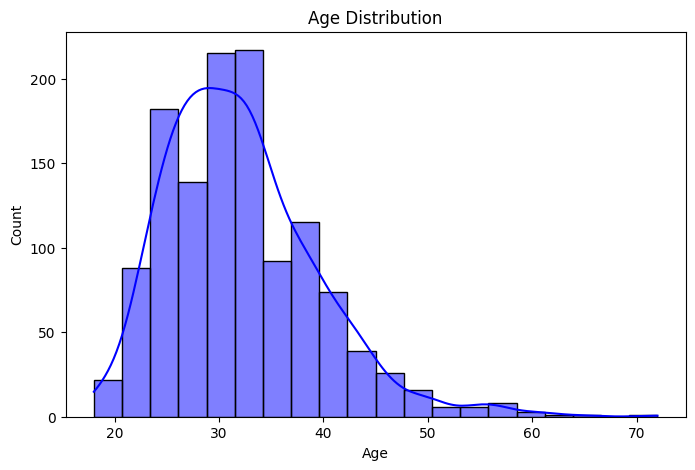

In [174]:
# Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-175-7ca346736fa2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2')


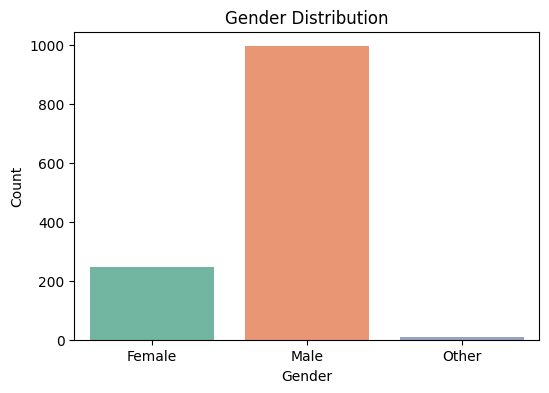

In [175]:
# Gender Distribution
plt.figure(figsize=(6, 4))
gender_counts = df['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Female', 'Male', 'Other'])
plt.show()

<ipython-input-176-380241743691>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=treatment_counts.index, y=treatment_counts.values, palette='Blues')


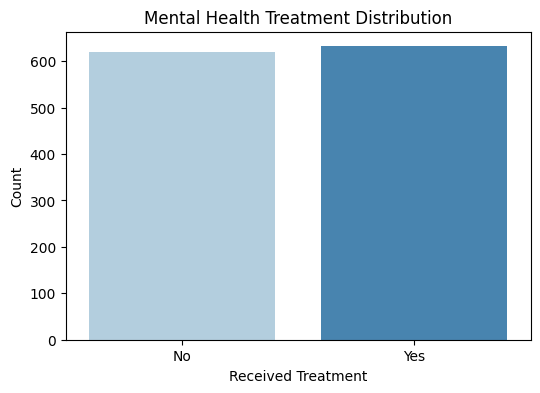

In [176]:
# Distribution of Mental Health Treatment
plt.figure(figsize=(6, 4))
treatment_counts = df['treatment_Yes'].value_counts()
sns.barplot(x=treatment_counts.index, y=treatment_counts.values, palette='Blues')
plt.title('Mental Health Treatment Distribution')
plt.xlabel('Received Treatment')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

<ipython-input-177-63dbe9577b34>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=work_interfere_counts.index, y=work_interfere_counts.values, palette='Set3')


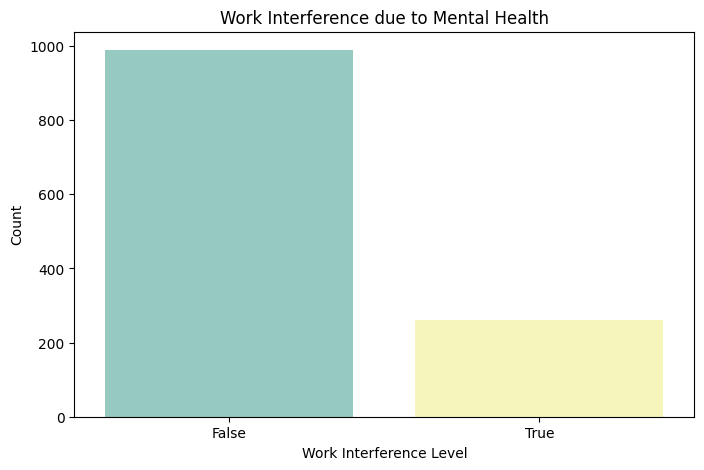

In [177]:
# Work Interference with Mental Health
plt.figure(figsize=(8, 5))
work_interfere_counts = df['work_interfere_Unknown'].value_counts()
sns.barplot(x=work_interfere_counts.index, y=work_interfere_counts.values, palette='Set3')
plt.title('Work Interference due to Mental Health')
plt.xlabel('Work Interference Level')
plt.ylabel('Count')
plt.show()

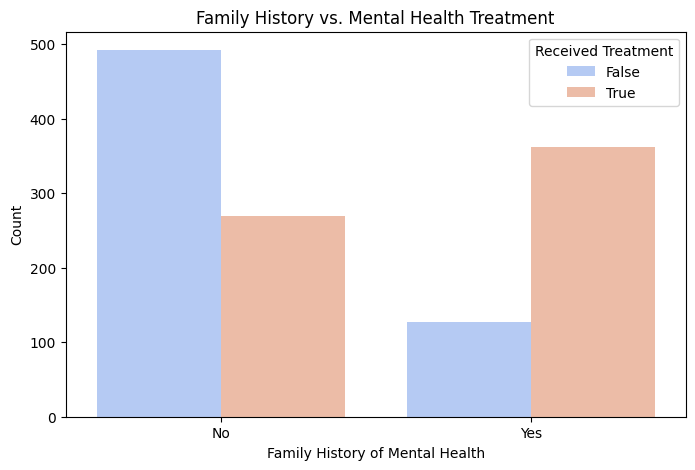

In [178]:
# Family History vs. Mental Health Treatment
plt.figure(figsize=(8, 5))
sns.countplot(x='family_history_Yes', hue='treatment_Yes', data=df, palette='coolwarm')
plt.title('Family History vs. Mental Health Treatment')
plt.xlabel('Family History of Mental Health')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Received Treatment', loc='upper right')
plt.show()

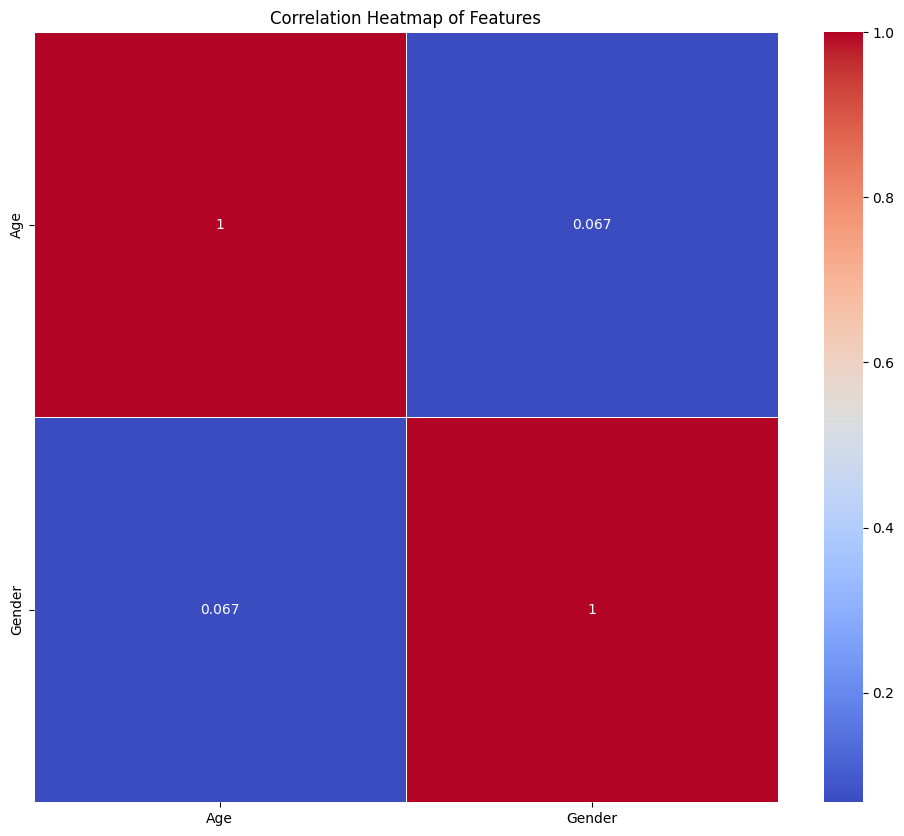

In [179]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
numeric_features = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# Training the models

In [180]:
# Defining features and target variable
X = df.drop(columns=['treatment_Yes', 'treatment_No'])  # Drop the target column
y = df['treatment_Yes']  # Target variable (1 = received treatment, 0 = no treatment)

In [181]:
# Converting categorical features into numeric using One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

In [182]:
# Splitting the dataset into train and test sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
# Normalizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [184]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
}

In [185]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(name.upper())
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("-"*50)

LOGISTIC REGRESSION
Accuracy: 0.7928
ROC-AUC: 0.7875
              precision    recall  f1-score   support

       False       0.79      0.73      0.76       113
        True       0.79      0.84      0.82       138

    accuracy                           0.79       251
   macro avg       0.79      0.79      0.79       251
weighted avg       0.79      0.79      0.79       251

--------------------------------------------------
RANDOM FOREST
Accuracy: 0.8088
ROC-AUC: 0.8036
              precision    recall  f1-score   support

       False       0.81      0.75      0.78       113
        True       0.81      0.86      0.83       138

    accuracy                           0.81       251
   macro avg       0.81      0.80      0.81       251
weighted avg       0.81      0.81      0.81       251

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:04:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBOOST
Accuracy: 0.7928
ROC-AUC: 0.7883
              precision    recall  f1-score   support

       False       0.79      0.74      0.76       113
        True       0.80      0.83      0.82       138

    accuracy                           0.79       251
   macro avg       0.79      0.79      0.79       251
weighted avg       0.79      0.79      0.79       251

--------------------------------------------------


# SHAP Analysis for Random Forest

In [186]:
# Defining features and target variable
X = df.drop(columns=['treatment_Yes', 'treatment_No'])  # Drop target column
y = df['treatment_Yes']

In [187]:
# Converting categorical features to numeric (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

In [188]:
# Converting all columns to float
X = X.astype(float)

In [189]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
# Loading trained Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)  # Train the model

RandomForestClassifier(random_state=42)

In [191]:
# Saving the trained model for future use
joblib.dump(rf_model, "random_forest_mental_health.pkl")

['random_forest_mental_health.pkl']

In [192]:
# Using TreeExplainer for Random Forest
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train)  # Compute SHAP values

In [193]:
if isinstance(shap_values, list):
    shap_values = shap_values[1]  # Taking the SHAP values for the "positive" class

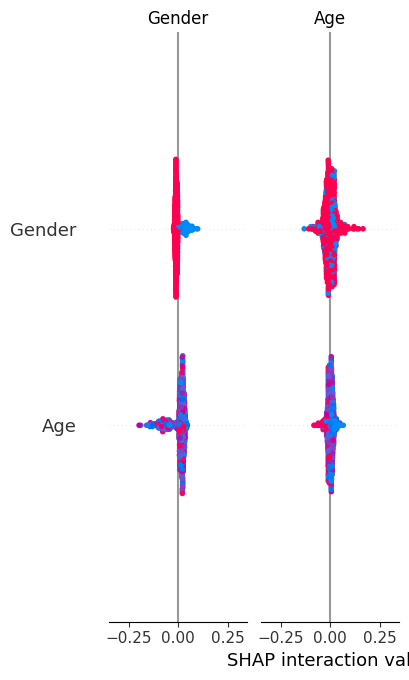

In [194]:
# SHAP Summary Plot (Overall Feature Impact)
shap.summary_plot(shap_values, X_train)

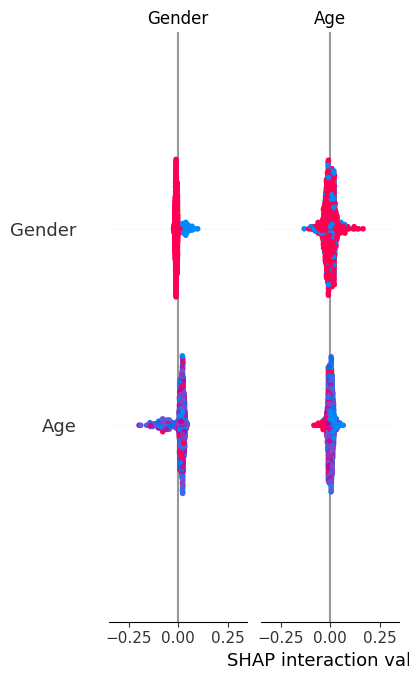

In [195]:
# SHAP Bar Plot (Feature Importance)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [204]:
shap.initjs()

# SHAP Force Plot (Explain a Single Prediction)
sample_index = 10  # Choose a row index to explain

# ✅ Extract SHAP values for class 1 (positive class)
shap_values_sample = shap_values[sample_index, :, 1]  # Select the 2nd dimension
X_sample = X_train.iloc[sample_index, :]  # Get corresponding feature values

# ✅ Ensure dimensions match
assert len(shap_values_sample) == len(X_sample), "Mismatch between SHAP values and features!"

# ✅ Generate Force Plot (New SHAP Syntax)
force_plot = shap.plots.force(
    explainer.expected_value[1],  # Expected value for class 1
    shap_values_sample,           # SHAP values for the positive class
    X_sample                      # Feature values
)

# ✅ Display the plot correctly in Jupyter Notebook
display(force_plot)


In [206]:
shap_values_df = pd.DataFrame(shap_values[:, :, 1], columns=X_train.columns)
shap_values_df.to_csv("shap_values.csv", index=False)

In [208]:
joblib.dump(rf_model, "mental_health_model.pkl")

['mental_health_model.pkl']

In [209]:
loaded_model = joblib.load("mental_health_model.pkl")
prediction = loaded_model.predict(X_test.iloc[[0]])  # Example prediction
print("Prediction:", prediction)

Prediction: [False]


# Develop Inference Script

In [210]:
# Load model
model = joblib.load("mental_health_model.pkl")

In [217]:
feature_names = model.feature_names_in_

In [221]:
def get_user_input():
    print("Mental Health Prediction System")

    age = int(input("Enter your age: "))
    gender = input("Enter your gender (Male/Female/Other): ").strip()
    family_history = input("Do you have a family history of mental illness? (Yes/No): ").strip()
    work_interfere = input("How often does mental health interfere with work? (Never/Rarely/Sometimes/Often): ").strip()
    tech_company = input("Do you work in a tech company? (Yes/No): ").strip()
    self_employed = input("Are you self-employed? (Yes/No/Unknown): ").strip()

    # Determine age group
    if age < 30:
        age_group = "Adult"
    elif 30 <= age < 50:
        age_group = "Middle Age"
    else:
        age_group = "Senior"

    # Initialize user data with all zero values
    user_data = {feature: 0 for feature in feature_names}

    # Assign input values to the correct one-hot encoded columns
    user_data["Age"] = age
    user_data[f"Gender_{gender}"] = 1  # One-hot encoding gender
    user_data[f"family_history_{family_history}"] = 1
    user_data[f"work_interfere_{work_interfere}"] = 1
    user_data["tech_company"] = 1 if tech_company == "Yes" else 0
    user_data[f"self_employed_{self_employed}"] = 1
    user_data[f"age_group_{age_group}"] = 1

    return pd.DataFrame([user_data])

In [222]:
user_df = get_user_input()
user_df = user_df.reindex(columns=feature_names, fill_value=0)
prediction = model.predict(user_df)

Mental Health Prediction System
Enter your age: 22
Enter your gender (Male/Female/Other): female
Do you have a family history of mental illness? (Yes/No): no
How often does mental health interfere with work? (Never/Rarely/Sometimes/Often): sometimes
Do you work in a tech company? (Yes/No): yes
Are you self-employed? (Yes/No/Unknown): no


In [223]:
print("Predicted Mental Health Condition:", "Needs Attention" if prediction[0] else "Likely Stable")


Predicted Mental Health Condition: Needs Attention


In [225]:
import joblib
import json

# Save the trained model
joblib.dump(model, "mental_health_model.pkl")

# Convert feature names to a list before saving
feature_names_list = list(feature_names)  # Ensure it's a Python list

# Save feature names
with open("feature_names.json", "w") as f:
    json.dump(feature_names_list, f)

print("Model and feature names saved successfully!")

Model and feature names saved successfully!
